In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft
from scipy.signal import periodogram

In [57]:
# dfcol =["Year","Day","Hour","ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]
# df=pd.read_csv('DATASETS\ACE_2020data.txt',sep=',',header=None,names=dfcol)
# df

In [58]:
dfcol =["Year","Day","Hour","ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]
df=pd.read_csv('DATASETS\ACE_DATA.txt',sep=',',header=None,names=dfcol)
df

,Year,Day,Hour,"ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"
0,1998,60,0,2.0,0.6,-1.9
1,1998,61,0,2.2,-5.0,-0.5
2,1998,62,0,0.9,-3.7,0.9
3,1998,63,0,0.6,1.6,-2.6
4,1998,64,0,-4.4,8.1,3.7
...,...,...,...,...,...,...
87,1998,147,0,0.4,-1.0,0.1
88,1998,148,0,-0.8,0.0,1.2
89,1998,149,0,-5.4,5.0,3.3
90,1998,150,0,0.5,0.9,-0.4


In [59]:
df = df[~df.isin([999.9]).any(axis=1)]
df.shape

(92, 6)

In [60]:
df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
df

,Year,Day,Hour,"ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT",datetime_column
0,1998,60,0,2.0,0.6,-1.9,1998-03-01
1,1998,61,0,2.2,-5.0,-0.5,1998-03-02
2,1998,62,0,0.9,-3.7,0.9,1998-03-03
3,1998,63,0,0.6,1.6,-2.6,1998-03-04
4,1998,64,0,-4.4,8.1,3.7,1998-03-05
...,...,...,...,...,...,...,...
87,1998,147,0,0.4,-1.0,0.1,1998-05-27
88,1998,148,0,-0.8,0.0,1.2,1998-05-28
89,1998,149,0,-5.4,5.0,3.3,1998-05-29
90,1998,150,0,0.5,0.9,-0.4,1998-05-30


In [61]:
impcol=["ACE Bx_gse, nT","ACE By_gse, nT","ACE Bz_gse, nT"]

In [62]:
df.dtypes

Year                        int64
Day                         int64
Hour                        int64
ACE Bx_gse, nT            float64
ACE By_gse, nT            float64
ACE Bz_gse, nT            float64
datetime_column    datetime64[ns]
dtype: object

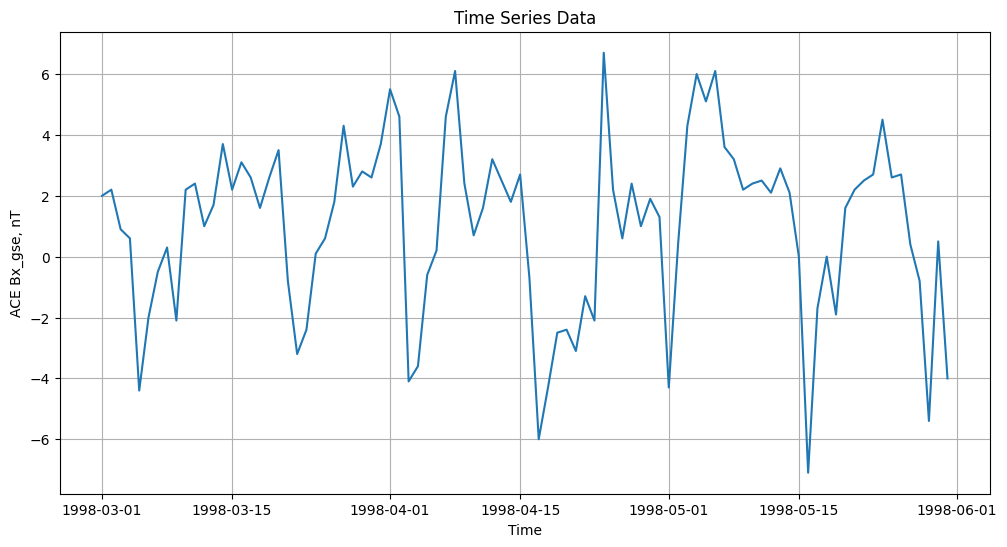

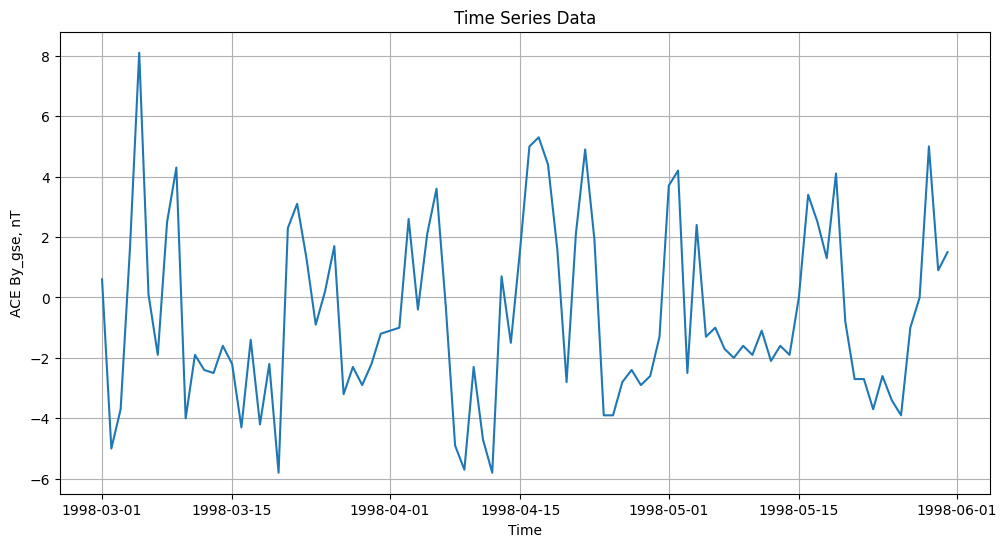

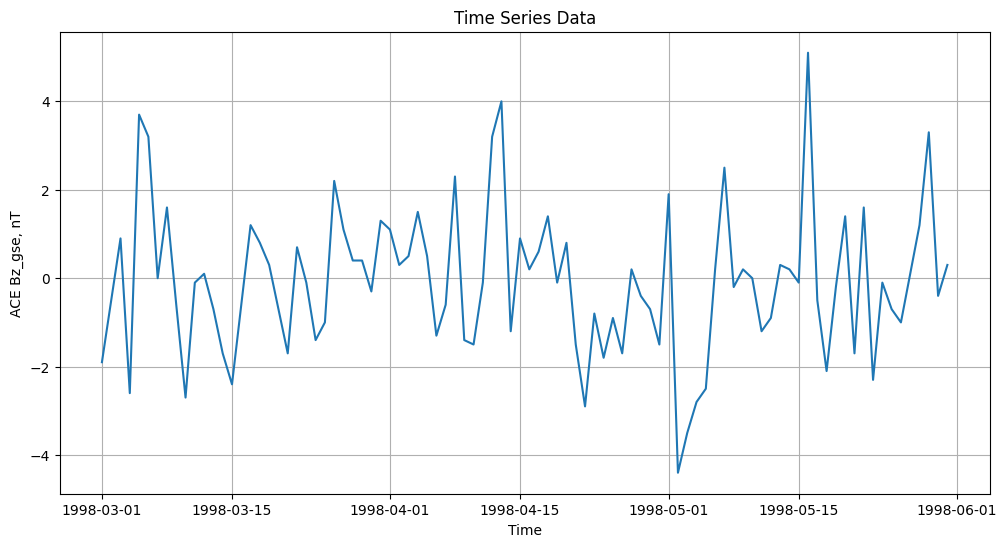

In [63]:
for i in impcol:
    plt.figure(figsize=(12, 6))
    plt.plot(df['datetime_column'], df[i])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel(i)
    plt.grid(True)
    plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_24532\2409200826.py:13: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / xf, amplitude)


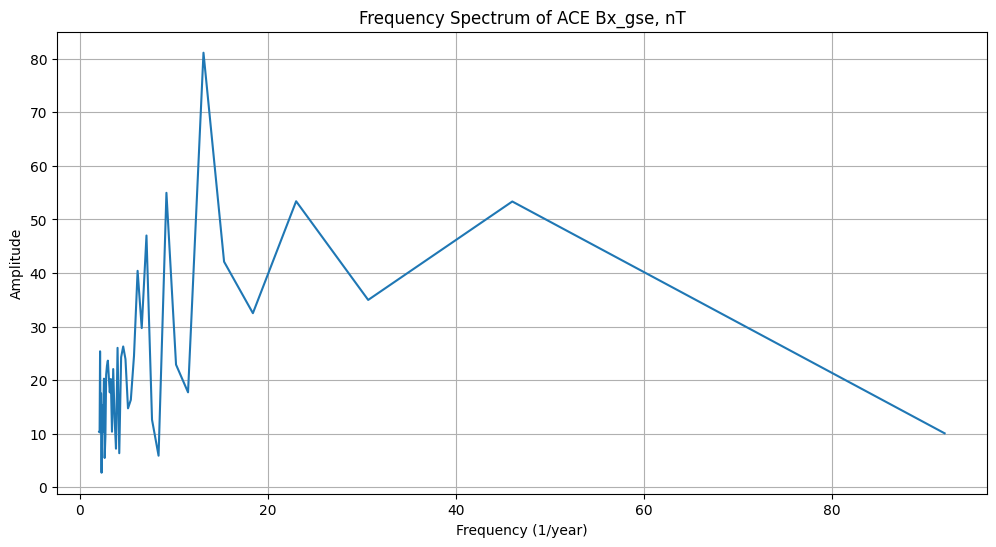

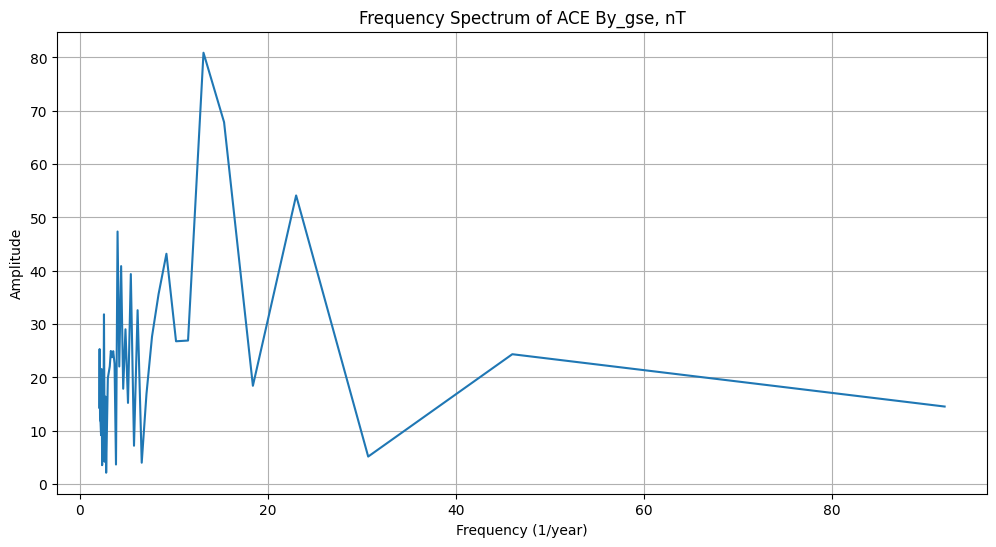

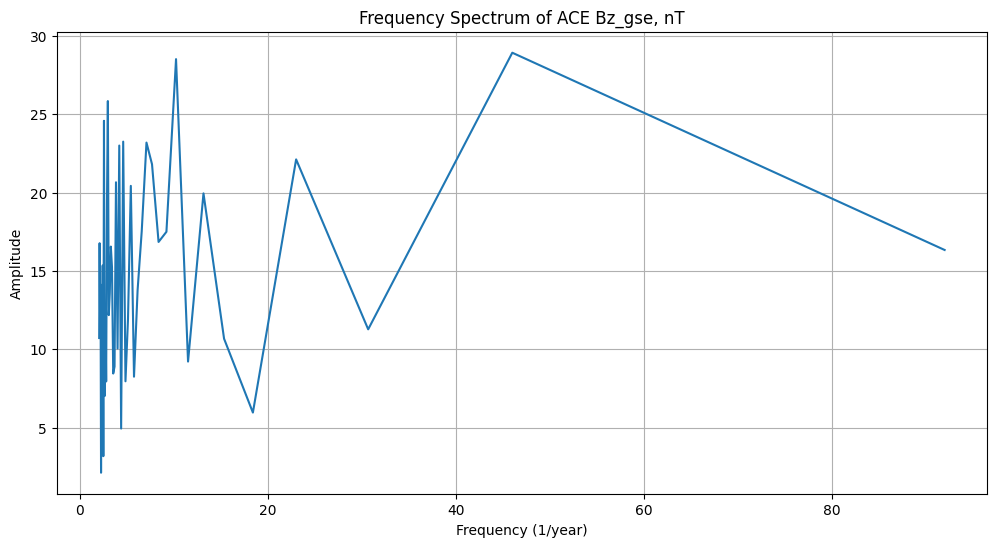

In [64]:
# Perform FFT on the time series data
for i in impcol:
    N = len(df)
    yf = fft(df[i].values)
    xf = np.fft.fftfreq(N, 1)  # Frequency bins

    # Calculate the amplitude spectrum (absolute values)
    amplitude = np.abs(yf)[:N // 2]
    xf = xf[:N // 2]

    # Plot the amplitude spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(1 / xf, amplitude)
    plt.title('Frequency Spectrum of '+i)
    plt.xlabel('Frequency (1/year)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


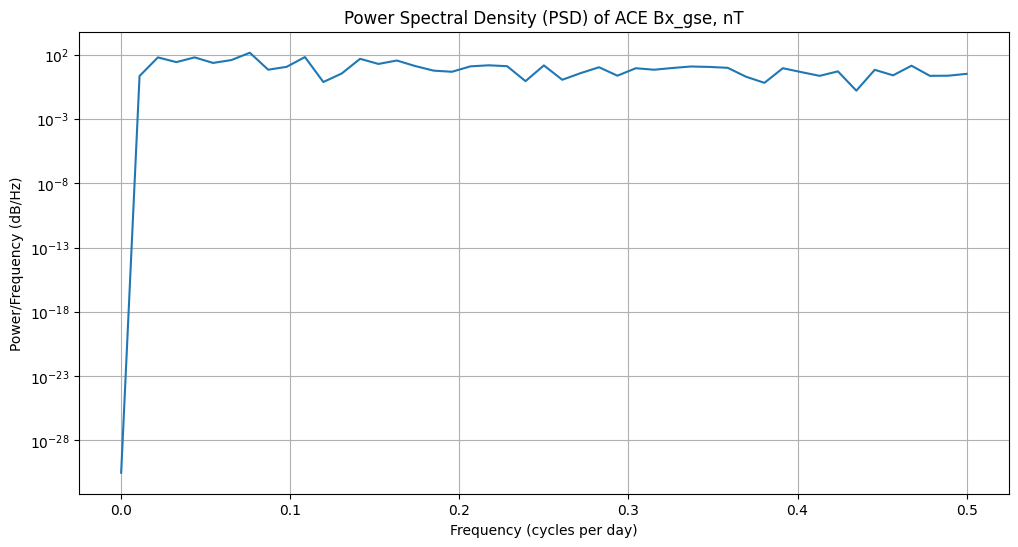

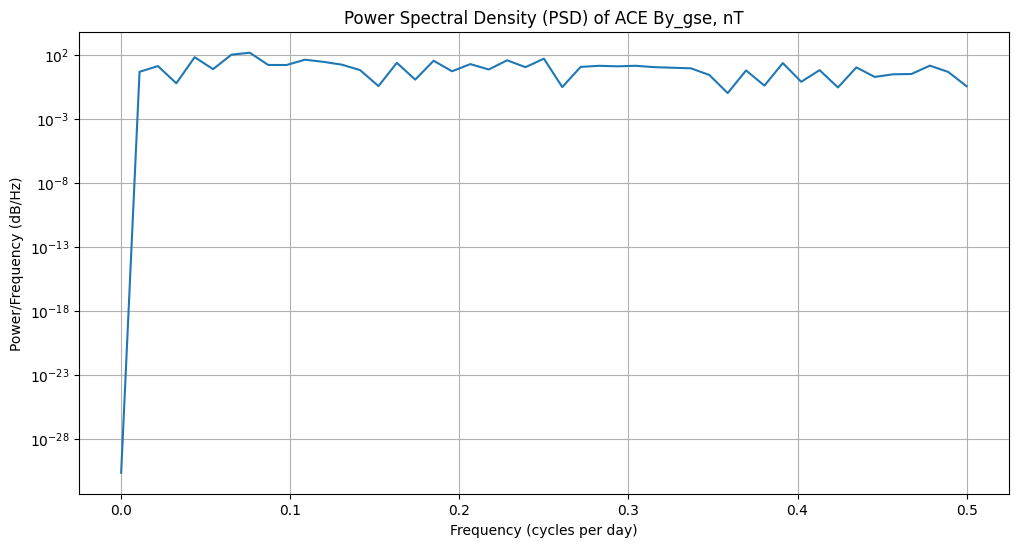

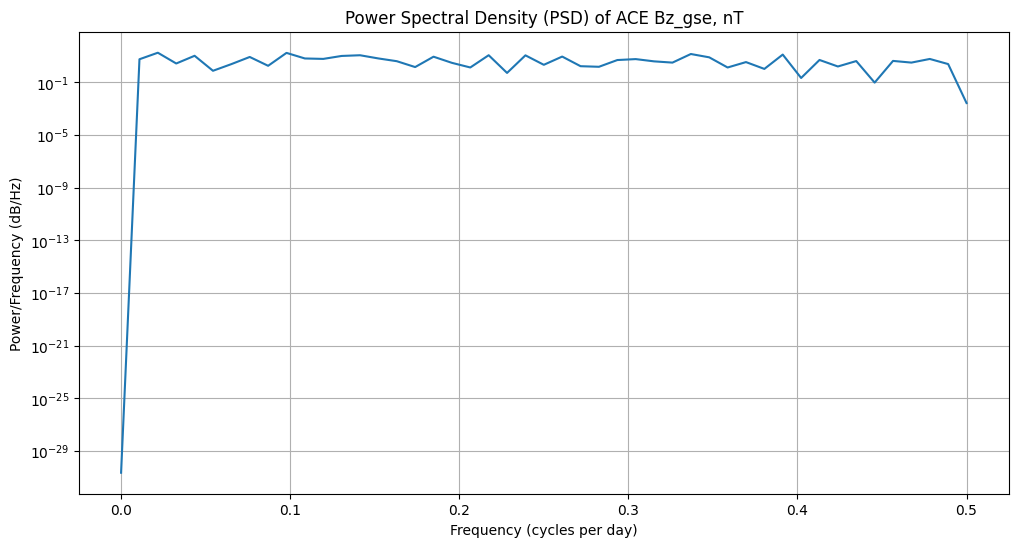

In [65]:
for i in impcol:
    frequencies, power_density = periodogram(df[i], fs=1.0)  # Assuming data is sampled daily

    # Plot the power spectral density
    plt.figure(figsize=(12, 6))
    plt.semilogy(frequencies, power_density)
    plt.title('Power Spectral Density (PSD) of '+i)
    plt.xlabel('Frequency (cycles per day)')
    plt.ylabel('Power/Frequency (dB/Hz)')
    plt.grid(True)
    plt.show()